---
title: "Homework-2"
author: "Brian Kwon"
format: 
  html: 
    embed-resources: true
---

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.1     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Problem-1

Consider the random variable defined by counting the number of failures until the first success, for independent trials with success probability $p$.  Given $p$ between $0$ and $1$, the __R__ commands `myattempts(p)` and `rgeom(1,p)` both simulate this random variable. Find a way of demonstrating that the two commands indeed give the same results, for five different values of p. 
_You may find the table() function useful._

Choose five p's of your choice, e.g. $p \in \{.1, .3, .5, .7, .9\}$. Run `myattempts` and `rgeom` each 10000 times. 



In [2]:
mytoss = function(p){
  u <- runif(1)
  x <- as.numeric(u < p)
  return(x)
}

myattempts = function(p){ 
    counter <- 0
    while (mytoss(p) == 0){ counter <- counter + 1 }
    return(counter)
}

a. For the first p, store the fraction of outcomes in the simulation in the columns of a suitable data frame and compare (Hint: use 3 columns to compare `rgeom()`, `myattempts()` and `dgeom()`) 



In [3]:
iter = 10000

In [4]:
df = merge(as.data.frame(table(replicate(iter,rgeom(1,0.1)))/iter),as.data.frame(table(replicate(iter,myattempts(0.1)))/iter), by = "Var1")
df = df %>% arrange(Var1)
df$dgeom = as.numeric(dgeom(0:iter,0.1))[1:nrow(df)]
colnames(df) = c('num_failure',"rgeom","myattempts","dgeom")
head(df)

,num_failure,rgeom,myattempts,dgeom
,<fct>,<dbl>,<dbl>,<dbl>
1,0,0.0948,0.0981,0.100000
2,1,0.0942,0.0909,0.090000
3,2,0.0775,0.0833,0.081000
4,3,0.0701,0.0764,0.072900
5,4,0.0691,0.0662,0.065610
6,5,0.0546,0.0589,0.059049


b. For the second p, Compare distribution by computing statistics such as mean and standard deviation. 



In [5]:
mean(replicate(iter,rgeom(1,0.3)))
mean(replicate(iter,myattempts(0.3)))

sd(replicate(iter,rgeom(1,0.3)))
sd(replicate(iter,myattempts(0.3)))

[1] 2.3539

[1] 2.2982

[1] 2.776613

[1] 2.828081

c. For the third p, plot both distributions as histograms in the same plot.  



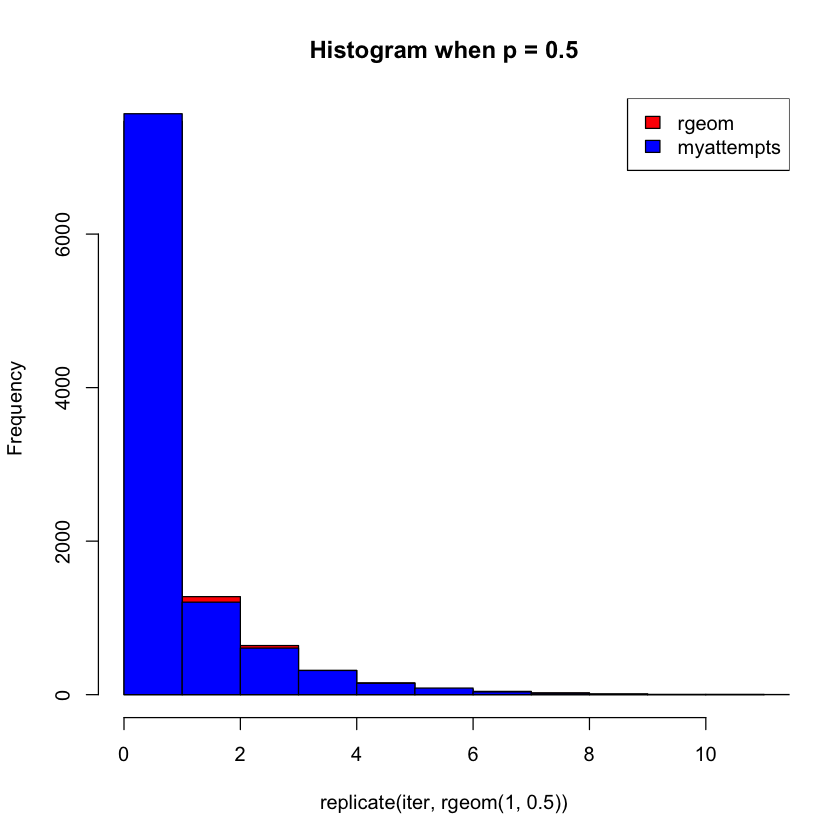

In [6]:
hist(replicate(iter,rgeom(1,0.5)),col="red",main = "Histogram when p = 0.5")
hist(replicate(iter,myattempts(0.5)), col = "blue", add = TRUE)
legend("topright", legend = c("rgeom", "myattempts"), fill = c("red", "blue"))

d. For the fourth p, make side-by-side box plots.  



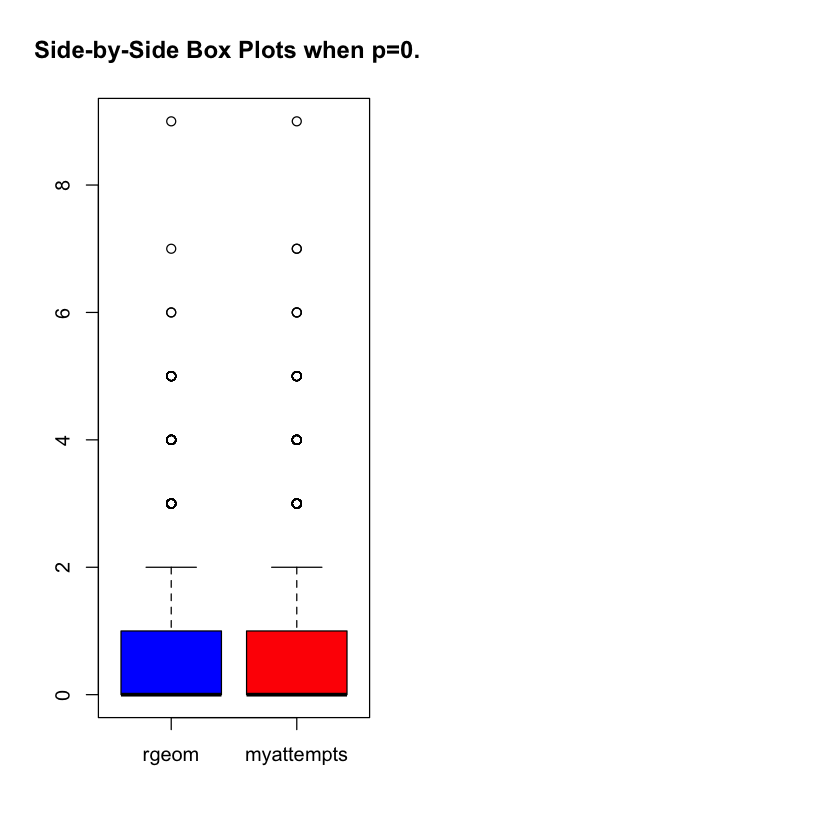

In [7]:
data1 = replicate(iter,rgeom(1,0.7))
data2 = replicate(iter,myattempts(0.7))

df = list(data1, data2)

par(mfrow = c(1, 2))

boxplot(df, col = c("blue", "red"), names = c("rgeom", "myattempts"),
        main = "Side-by-Side Box Plots when p=0.7")

e. For the fifth p, plot the two empirical distribution functions in the same plot.  




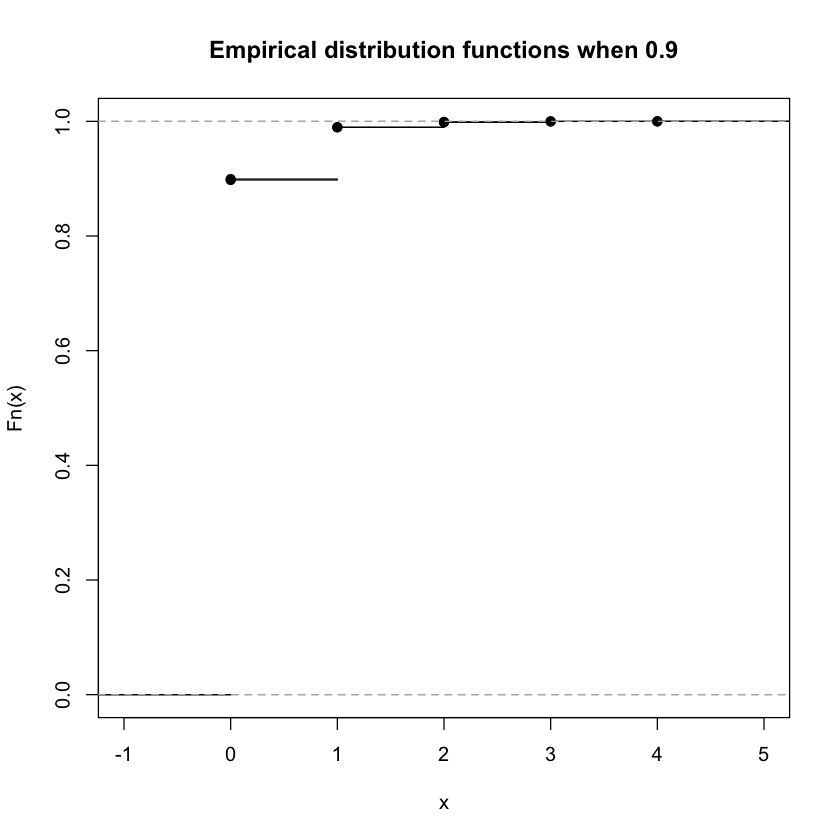

In [8]:
plot.ecdf(replicate(iter,rgeom(1,0.9)), main = "Empirical distribution functions when 0.9")
plot.ecdf(replicate(iter,myattempts(0.9)), add = TRUE)

## Problem-2 

Consider the following random experiment: draw a uniformly distributed random number $X_1$ from the interval $(0,1)$. Next, draw a uniformly distributed random number $X_2$ from the interval $(0,1+X_1)$, a uniformly distributed random number $X_3$ from the interval $(0,1+X_2)$ and so on until $X_{20}$. 

Use a monte carlo simulation to give an approximate answer to What is the mean value of $X_{20}$? and use a histogram to identify the distribution of $X_{20}$.

$X_1 \sim unif(0,1)$
$X_2 \sim unif(0,1+X_1)$
$X_3 \sim unif(0,1+X_2)$
.
.
.
$X_{20} \sim unif(0,1+X_{19})$

The __R__ command for drawing a uniformly distributed random number from the interval $(0,b)$ is _runif(1,min = 0, max = b)_.



In [9]:
my_runif = function(t){
    Xt = c()
    for(i in 1:t){
        if(i == 1){
        Xt = c(Xt,runif(1,0,1)) # Init X1
        } else {
            Xt = c(Xt,runif(1,0,1+Xt[i-1])) # Calculate Xn by adding Xn-1
        }
    }
    return(Xt[t])
}

The mean of X20 is 1.005243

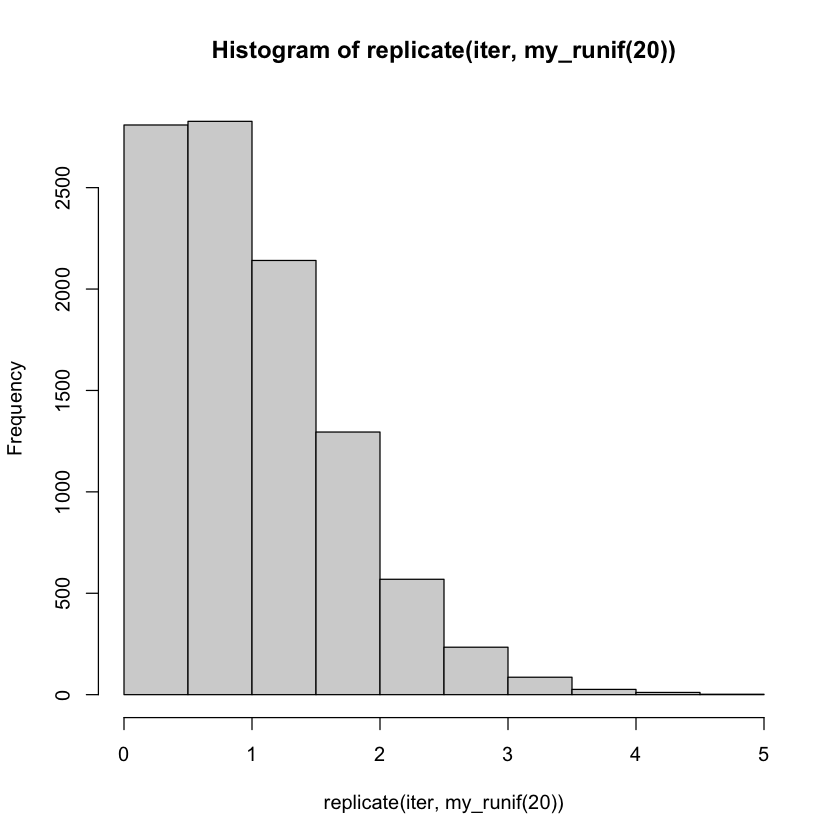

In [10]:
iter = 10000
cat("The mean of X20 is",mean(replicate(iter,my_runif(20))))
hist(replicate(iter,my_runif(20)))

## Problem-3


Suppose that the daily power consumption of a major city, $X$, has a Gamma distribution with shape parameter $r = 4$ and scale parameter $\rho = 2$. Use __R__ to compute the following quantities: 



a. $Prob(X \le 12)$   


In [11]:
pgamma(12,4,0.5)

[1] 0.8487961

b. $Prob(X > 5)$  


In [12]:
1 - pgamma(5,4,0.5)

[1] 0.7575761

c. $Prob(|X-8|) < 1$  

(Hint:$|X-8| < 1$ is equivalent to $7 < X < 9$)


In [13]:
pgamma(9,4,0.5)-pgamma(7,4,0.5)

[1] 0.1943367

d. $z$ such that $Prob(X < z) = .95$  




In [14]:
qgamma(0.95,4,0.5)

[1] 15.50731

## Problem-4 

Probability theory says that a binomial distribution, $B(n,p)$ is close to that of a normal distribution with mean $np$ and standard deviation $\sqrt{np(1-p)}$, if $np$ and $n(1-p)$ are both sufficiently large, e.g. at least 10.

Check this by plotting both cumulative distribution functions in the same figure, using a staircase plot for the binomial distribution and a line plot for the normal distribution, for three different cases: a case where both $np$ and $n(1-p)$ are large, a case where $np$ is large and $n(1-p) < 10$, and a case where $np < 10$ and $n(1-p) < 10$.

Describe what happens in all three cases. In what sense are the cdf's not close in cases 2 and 3? (Hint: Compare with a cdf of the normal distribution)

(Hint: You can specify a staircase plot using the `lines()` function and passing the optional parameter `type=s`)




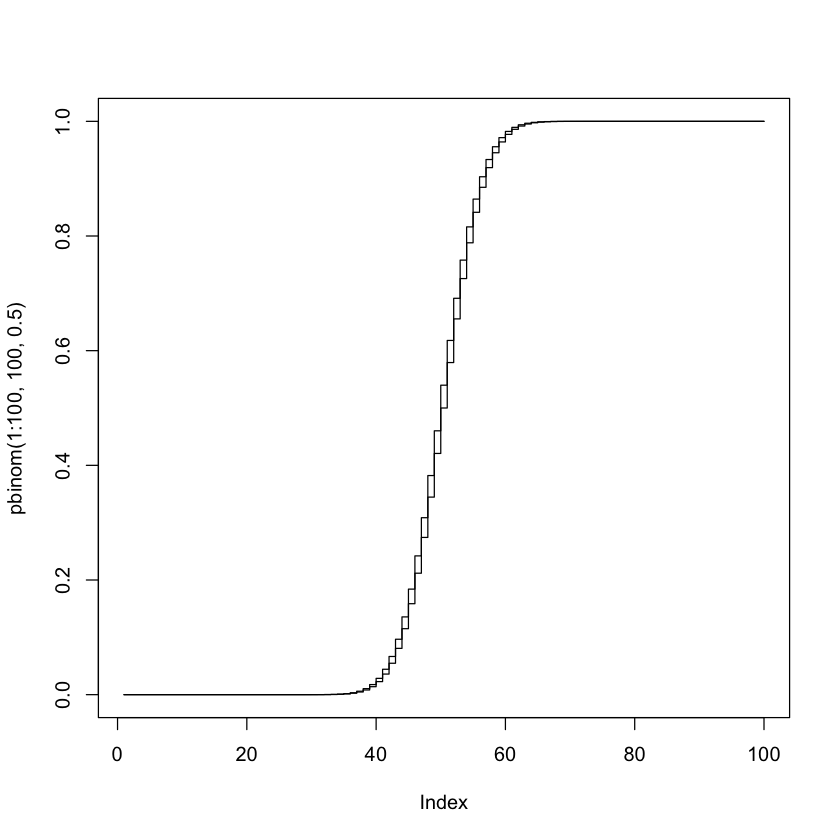

In [15]:
# n = 100, p = 0.5
plot(pbinom(1:100,100,0.5), type = "s")
lines(pnorm(1:100,50,sqrt(100*0.5*0.5)), type = "s")

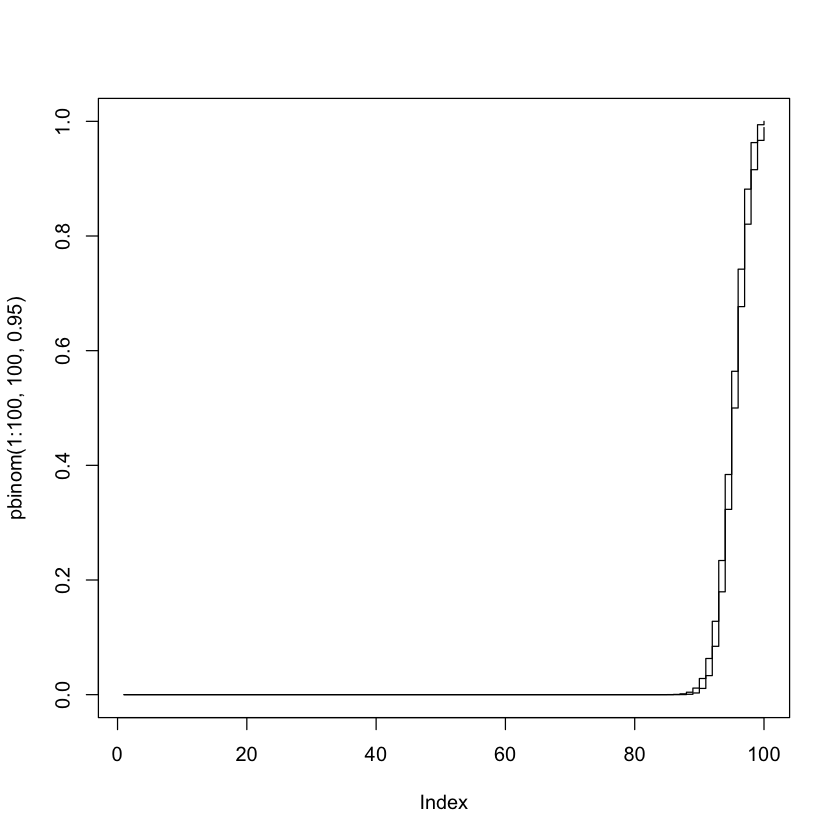

In [16]:
# n = 100, p = 0.95
plot(pbinom(1:100,100,0.95), type = "s")
lines(pnorm(1:100,95,sqrt(100*0.95*0.05)), type = "s")

The plot is skewed to right.

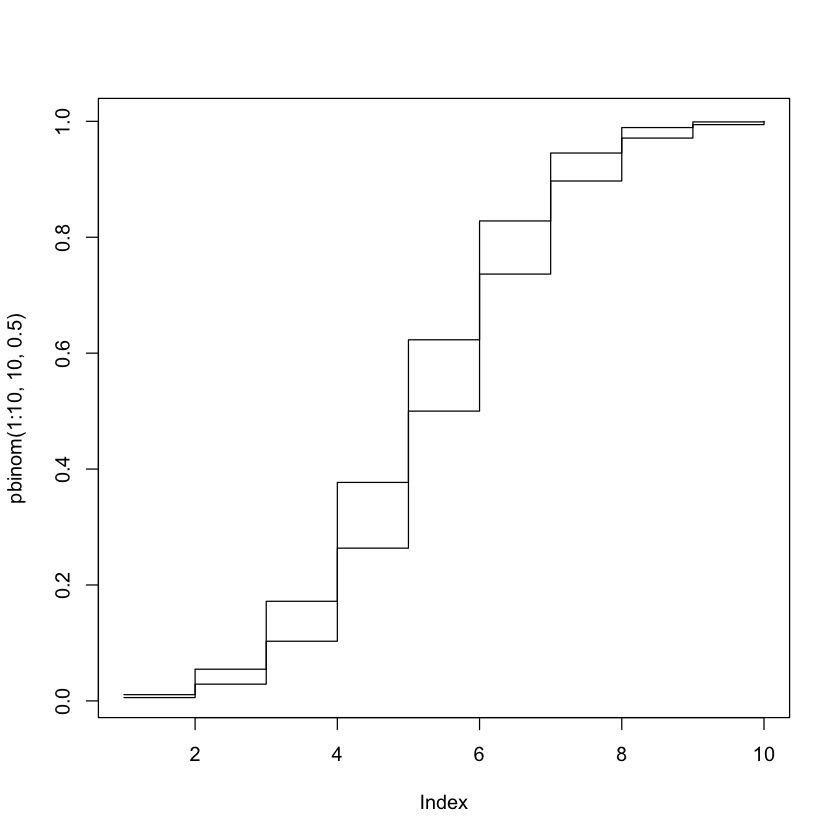

In [17]:
# n = 10, p = 0.5
plot(pbinom(1:10,10,0.5), type = "s")
lines(pnorm(1:10,5,sqrt(10*0.5*0.5)), type = "s")

## Problem-5 

A graphical technique for checking whether a sample has an approximate normal distribution is a "quantile-quantile" plot. The __R__ command is `qqnorm(x)`, where $x$ is the vector of sample values. If the plot is approximately a straight line, then this suggests that the sample comes from a normal distribution. Use the dataset from the `openintro` package to find out which of the the four distributions (three exams and course grade) is the closest to a normal distribution? You can load the dataset with the following commands `library(openintro)` and `data(exam_grades)`. Explore this by making `qqnorm()` and `qqline()` plots of the four distributions How close to straight lines are the plots in each case? How do the plots differ from straight lines? Hint: Make sure to remove the NA values.




In [18]:
library(openintro)
library(tidyverse)

Loading required package: airports

Loading required package: cherryblossom

Loading required package: usdata



In [19]:
exam_grades = drop_na(exam_grades)

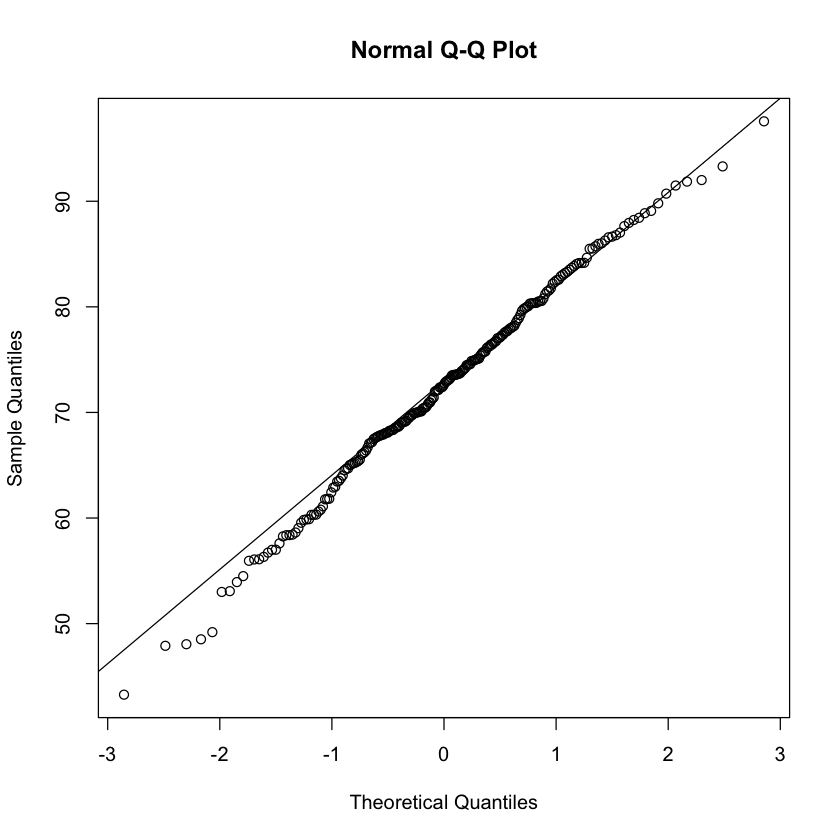

In [20]:
qqnorm(exam_grades$course_grade)
qqline(exam_grades$course_grade)

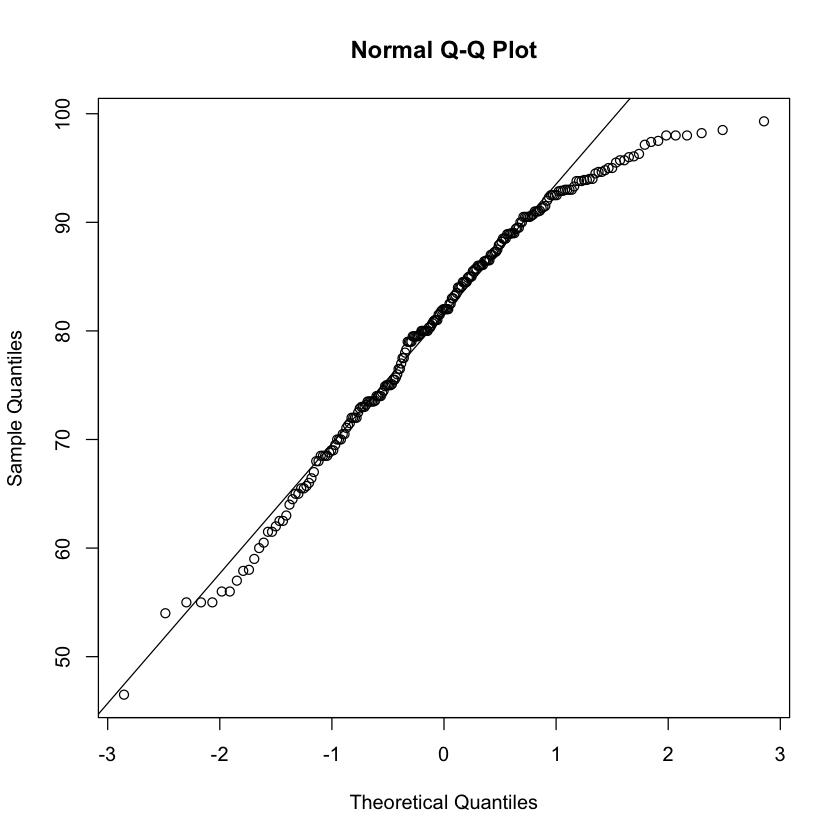

In [21]:
qqnorm(exam_grades$exam1)
qqline(exam_grades$exam1)

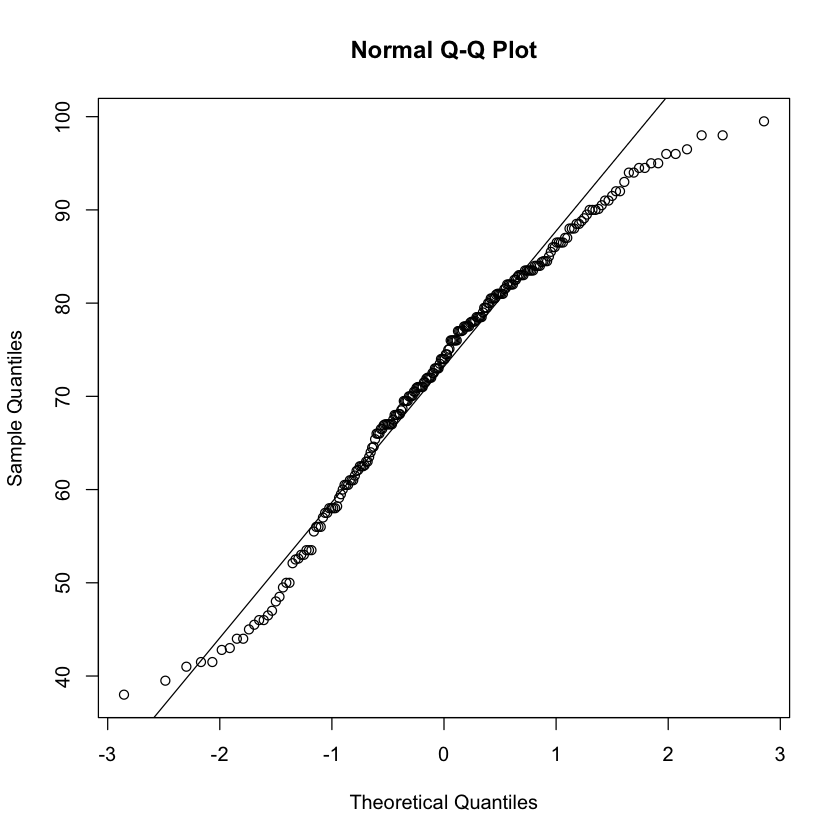

In [22]:
qqnorm(exam_grades$exam2)
qqline(exam_grades$exam2)

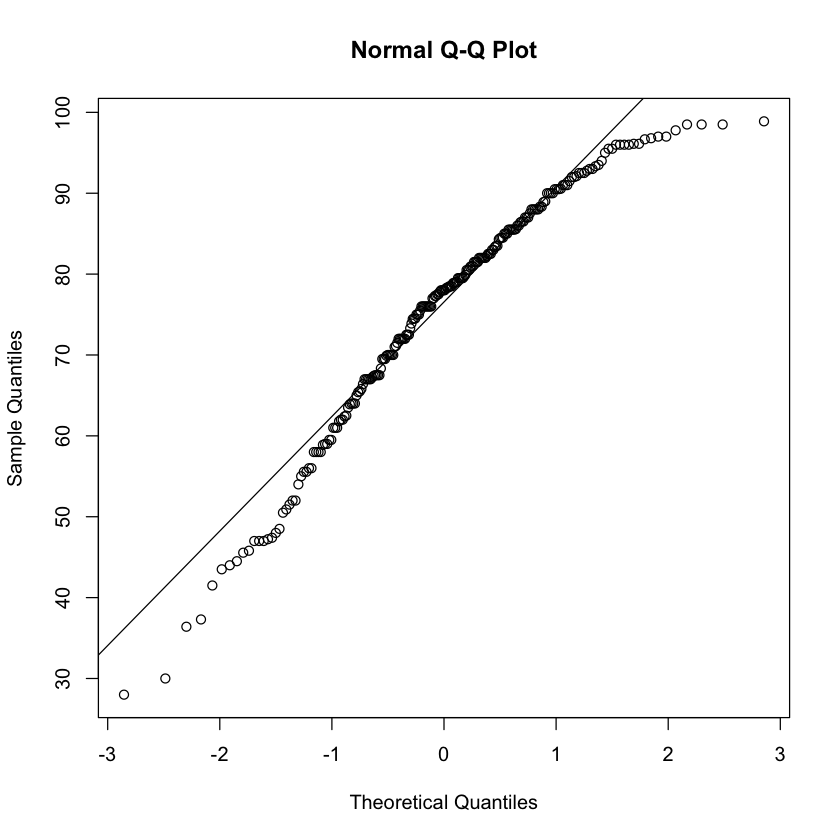

In [23]:
qqnorm(exam_grades$exam3)
qqline(exam_grades$exam3)

The course grade looks like it is the closest to the normal distribution.

## Problem-6 

If $X$ has a continuous distribution with cumulative distribution function $F$, then the new random variable $U = F(X)$ has a uniform $U(0,1)$ distribution. Verify this with simulations for three different continuous distributions of your choice, by making a random sample of sufficient size, sorting it, plugging it into the cdf $F$, and plotting the result.




In [24]:
n = 10000

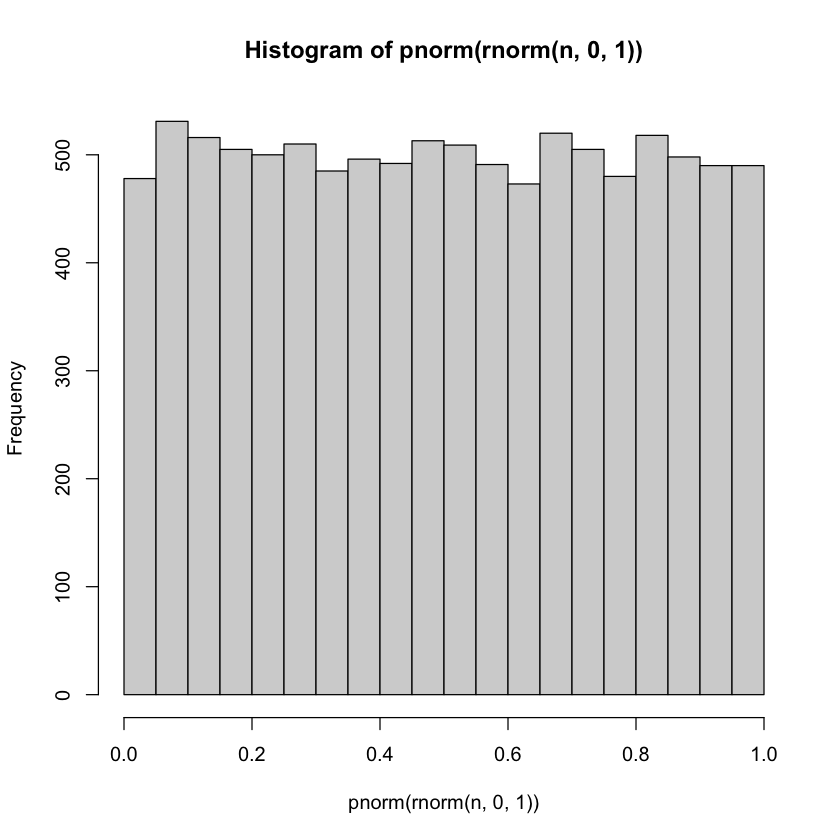

In [25]:
hist(pnorm(rnorm(n,0,1)))

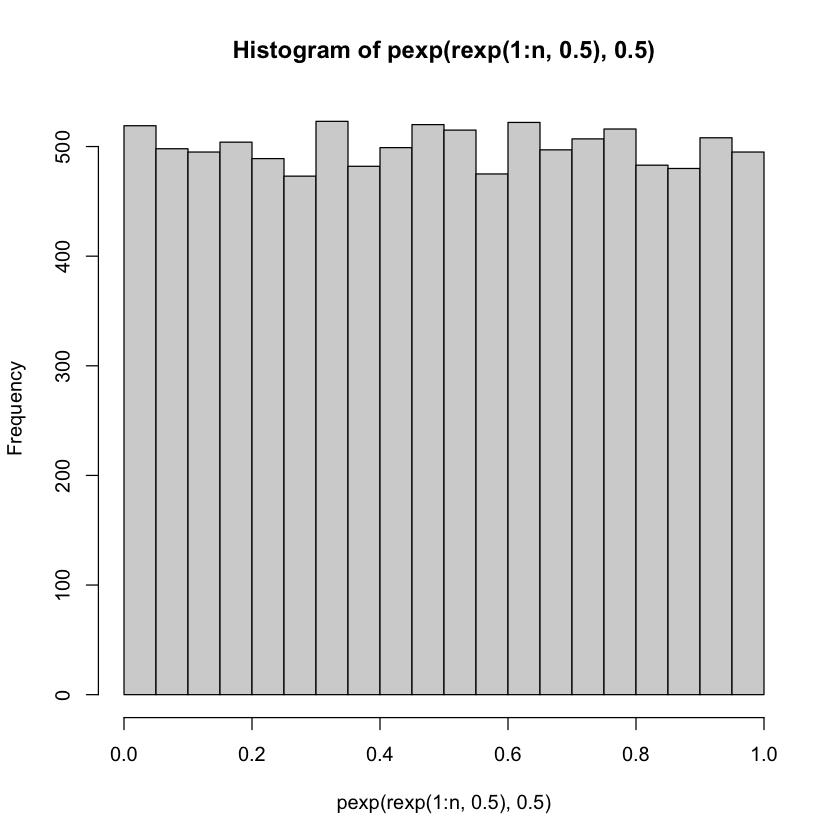

In [26]:
hist(pexp(rexp(1:n,0.5),0.5))

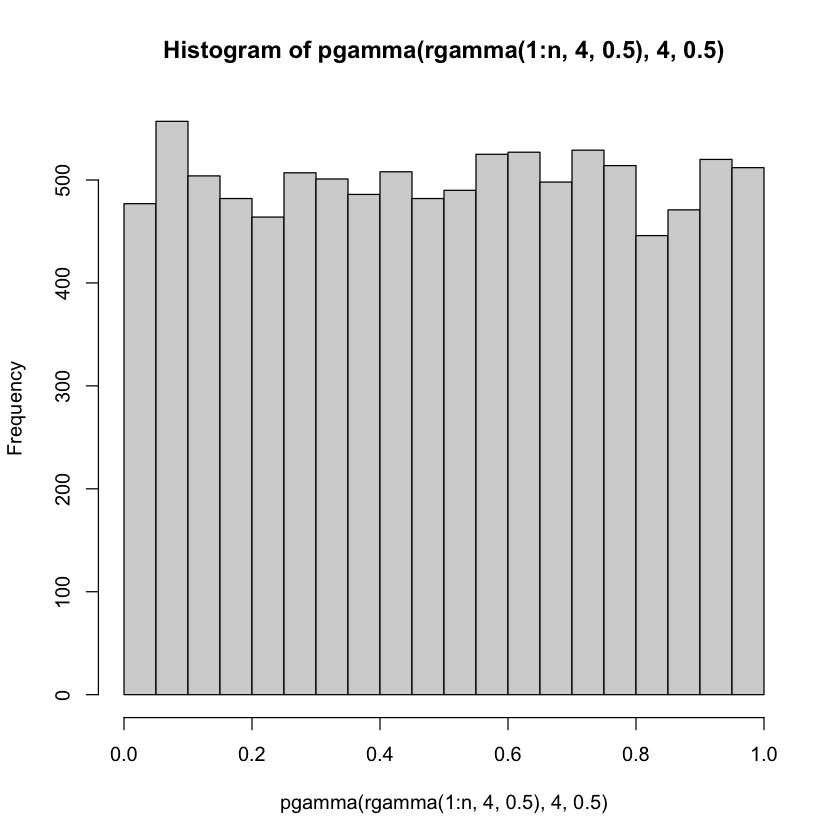

In [27]:
hist(pgamma(rgamma(1:n,4,0.5),4,0.5))

## Optional additional problem

Suppose for $X = X_1 + X_2$ is the sum of two exponentially distributed random variables with the same parameter $\lambda$. Then $X^\alpha$ is very nearly normally distributed for a suitable choice of $\alpha$. Determine an approximate value for $\alpha$ (within 0.05), using a simulation and `qqnorm()` plots for each of your choices of $\alpha$. 
